In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [2]:
dbname = 'fullsky5year.db'

In [3]:
con = sqlite3.connect("fullsky5year.db")

### Quick Inspection

In [4]:
mjds = pd.read_sql_query("""
SELECT DISTINCT mjd FROM noAstromErr
""", con)

In [5]:
len(mjds)

28758

In [6]:
visits = pd.read_sql_query("""
SELECT DISTINCT obshistid FROM noAstromErr
""", con)

In [7]:
len(visits.obshistid)

28758

In [4]:
noErr = pd.read_sql_query("""
SELECT * FROM noAstromErr
""", con)
noErr.head()

,diaid,obshistid,ssmid,ra,dec,mjd,mag,snr
0,0,88648008,293470,222.105356,-25.922042,51028.961825,19.439661,28.546017
1,1,88648008,345561,223.344112,-25.024152,51028.961825,18.664966,58.267111
2,2,88648008,347355,224.888605,-26.936094,51028.961825,20.470075,11.050455
3,3,88648008,347486,224.737465,-27.019030,51028.961825,20.903364,7.414200
4,4,88648008,352241,224.059843,-27.670461,51028.961825,20.606525,9.745406


In [5]:
# Lets take a look at the first 
obshist1 = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE obshistid = 88648008;
""", con)
obshist1.head()

,diaid,obshistid,ssmid,ra,dec,mjd,mag,snr
0,0,88648008,293470,222.105356,-25.922042,51028.961825,19.439661,28.546017
1,1,88648008,345561,223.344112,-25.024152,51028.961825,18.664966,58.267111
2,2,88648008,347355,224.888605,-26.936094,51028.961825,20.470075,11.050455
3,3,88648008,347486,224.737465,-27.019030,51028.961825,20.903364,7.414200
4,4,88648008,352241,224.059843,-27.670461,51028.961825,20.606525,9.745406


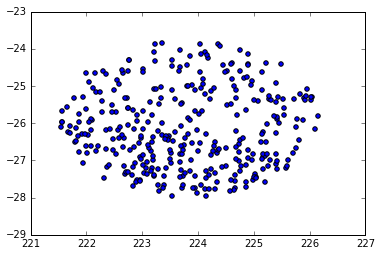

In [6]:
fig, ax = plt.subplots(1,1)
ax.scatter(obshist1.ra, obshist1.dec)

In [7]:
obshist2 = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE obshistid = 88648009;
""", con)
obshist2.head()

,diaid,obshistid,ssmid,ra,dec,mjd,mag,snr
0,340,88648009,279772,221.961212,-22.434322,51028.962275,16.947859,282.167067
1,341,88648009,289222,222.476704,-21.148592,51028.962275,21.037617,6.525338
2,342,88648009,350789,222.454675,-23.875420,51028.962275,19.231781,34.430043
3,343,88648009,361765,221.088133,-24.207378,51028.962275,20.916420,7.295953
4,344,88648009,363479,220.129034,-23.150910,51028.962275,21.323051,5.016831


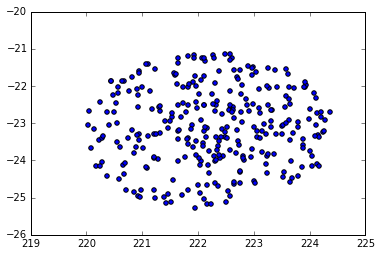

In [8]:
fig, ax = plt.subplots(1,1)
ax.scatter(obshist2.ra, obshist2.dec)

In [9]:
obshist3 = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE obshistid = 88648010;
""", con)
obshist3.head()

,diaid,obshistid,ssmid,ra,dec,mjd,mag,snr
0,640,88648010,1436,220.468991,-19.509206,51028.962725,21.211318,5.526917
1,641,88648010,289222,222.476838,-21.148657,51028.962725,21.037624,6.485751
2,642,88648010,316967,220.476108,-19.290882,51028.962725,20.090515,15.516870
3,643,88648010,331002,219.637598,-19.962182,51028.962725,21.263701,5.266591
4,644,88648010,342393,222.011132,-19.945734,51028.962725,20.958027,6.979095


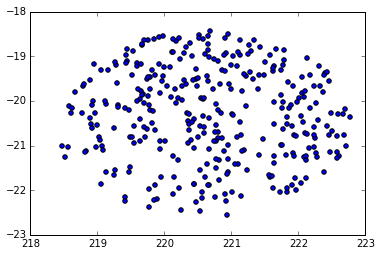

In [10]:
fig, ax = plt.subplots(1,1)
ax.scatter(obshist3.ra, obshist3.dec)

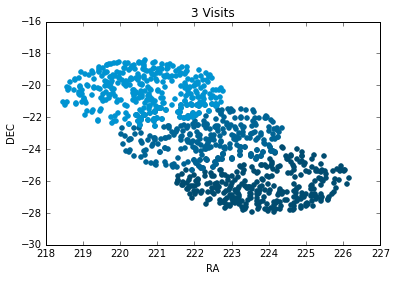

In [11]:
fig, ax = plt.subplots(1,1)
color = ['#004C70','#006495','#0093D1']
for i,n in enumerate([obshist1,obshist2,obshist3]):
    ax.scatter(n.ra, n.dec,color=color[i])
    
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_title('3 Visits')

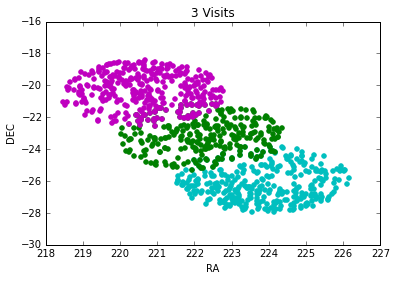

In [12]:
fig, ax = plt.subplots(1,1)
color = ['c', 'g', 'm', 'm']
for i,n in enumerate([obshist1,obshist2,obshist3]):
    ax.scatter(n.ra, n.dec,color=color[i])
    
ax.set_xlabel('RA')
ax.set_ylabel('DEC')
ax.set_title('3 Visits')

### Data Plotting

In [13]:
def _plotPrettyMaker(ax, title, xlabel='RA', ylabel='DEC'):
    
    ax.set_xlabel(xlabel, size=14)
    ax.set_ylabel(ylabel, size=14)
    ax.set_title(title)
    
    return

In [14]:
def objectPlot(ssmid):
    
    obj = pd.read_sql_query("""
    SELECT * FROM noAstromErr
    WHERE ssmid = %s;
    """ % (ssmid), con)
    
    fig, ax = plt.subplots(1,1)
    ax.scatter(obj.ra,obj.dec,c=np.arange(len(obj.ra)),cmap='Blues')
    
    _plotPrettyMaker(ax, 'SSMID %s' % (ssmid))
    
    return
    

In [15]:
def visitPlot(obshistid):
    
    fig, ax = plt.subplots(1,1)
    for obs in obshistid:
        obs = pd.read_sql_query("""
        SELECT * FROM noAstromErr
        WHERE obshistid = %s;
        """ % (obs), con)
        ax.scatter(obs.ra,obs.dec)

    #if len(obhistid) > 1:
     #   _plotPrettyMaker(ax, '%s OBSHISTIDs' % (len(obshistid))
    #else:
     #   _plotPrettyMaker(ax, 'OBSHISTID %s' % (obshistid))
                         
    return
    

In [16]:
def mjdPlot(mjd):
    fig, ax = plt.subplots(1,1)
    for d in mjd:
        mjd = pd.read_sql_query("""
        SELECT * FROM noAstromErr
        WHERE mjd = %s;
        """ % (mjd), con)
        ax.scatter(mjd.ra,mjd.dec)
    
    
    _plotPrettyMaker(ax, 'MJD %s' % (mjd))
    return

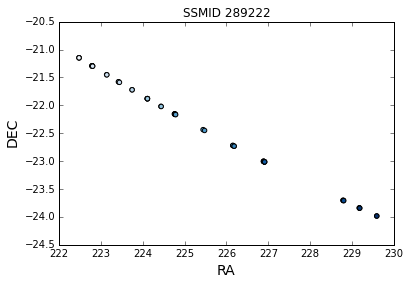

In [17]:
objectPlot('289222')

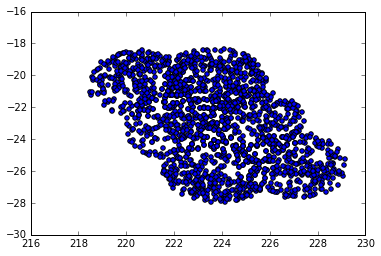

In [20]:
visitPlot(['88648008','88648009','88648010','88648011','88648012','88648013'])